# Basic analysis

As already shown in {numref}`sec:pyalf_minimal_example`, the basic analysis can be executed through {func}`py_alf.Simulation.analysis`, which in turn calls {func}`py_alf.analysis`. This section demonstrates how to directly use the latter function and how to access and work with analysis results.

As a first step, some libraries and functions are imported. The Jupyter magic command `%matplotlib widget` enables the [Matplotlib Jupyter Widget Backend](https://github.com/matplotlib/ipympl), which is not necessary in this part, but for the functions used in {numref}`sec:pyalf-check_warmup`, therefore it makes sense to establish it as a default.

In [1]:
# Enable Matplotlib Jupyter Widget Backend
%matplotlib widget

# Imports
import numpy as np                      # Numerical libary
import matplotlib.pyplot as plt         # Plotting library
from py_alf.analysis import analysis    # Analysis function
from py_alf.utils import find_sim_dirs  # Function for finding QMC bins
from py_alf.ana import load_res         # Function for loading analysis results

In [2]:
# Change some Matplotlib defaults for nicer figures
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [5, 3]
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "STIX"
mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rcParams["xtick.direction"] = 'in'
mpl.rcParams["ytick.direction"] = 'in'
mpl.rcParams["xtick.top"] = True
mpl.rcParams["ytick.right"] = True
mpl.rcParams["figure.constrained_layout.use"] = True

The function {func}`find_sim_dirs() <py_alf.utils.find_sim_dirs>` returns a list of all directories containing a file named `data.h5`, the file containing all QMC measurements if ALF has been compiled with HDF5. We use it to conveniently list all simulations run in the previous sections.

In [3]:
dirs = find_sim_dirs()
dirs

['./ALF_data/Hubbard',
 './ALF_data/Hubbard_L1=4_L2=4_U=1.0',
 './ALF_data/Hubbard_L1=4_L2=4_U=2.0',
 './ALF_data/Hubbard_L1=4_L2=4_U=3.0',
 './ALF_data/Hubbard_L1=4_L2=4_U=4.0',
 './ALF_data/Hubbard_Square',
 './ALF_data/temper_Hubbard_L1=4_L2=4_U=2.5/Temp_0',
 './ALF_data/temper_Hubbard_L1=4_L2=4_U=2.5/Temp_1',
 './ALF_data_back/Hubbard_Square']

Looping over this list, we call {func}`analysis() <py_alf.analysis>` for each directory. The function reads QMC bins from `data.h5`, or if this file does not exist alternatively from all files ending in `_scal`, `_eq` and `_tau`. Furthermore, `n_skip` and `n_rebin` are read from the file `parameters`. The analysis omits the first `n_skip` bins and combines `n_rebin` original bins into a new one[^rebin]. 
On the resulting bins, Jackknife resampling&nbsp;{cite}`efron1981` is applied to estimate expectation values and their standard error. For brevity, the resulting printout is truncated.

[^rebin]: We will elaborate further on rebinning in {numref}`sec:pyalf-check_warmup`.

In [4]:
for directory in dirs:
    analysis(directory)

### Analyzing ./ALF_data/Hubbard ###
/home/jonas/dissertation/jb/chap4_pyalf/usage
Scalar observables:
Ener_scal
Kin_scal
Part_scal
Pot_scal
Histogram observables:
Equal time observables:
Den_eq
Green_eq
SpinT_eq
SpinXY_eq
SpinZ_eq
Time displaced observables:
Den_tau
Green_tau
SpinT_tau
SpinXY_tau
SpinZ_tau
### Analyzing ./ALF_data/Hubbard_L1=4_L2=4_U=1.0 ###
/home/jonas/dissertation/jb/chap4_pyalf/usage
Scalar observables:
...
...
...


## Get analysis results

The analysis results are saved in each simulation directory, both in plain text in the folder `res` and as a {mod}`pickled <pickle>` Python dictionary in the file `res.pkl`.

The binary data from multiple `res.pkl` files can be conveniently read with {func}`load_res() <py_alf.ana.load_res>`, which returns a single {class}`pandas DataFrame <pandas.DataFrame>`, a tabular data structure. It not only contains analysis results, but also the Hamiltonian-specific parameters. The parameter names are in all lower case.

In [5]:
res = load_res(dirs)

./ALF_data/Hubbard
No orbital locations saved.
./ALF_data/Hubbard_L1=4_L2=4_U=1.0
No orbital locations saved.
./ALF_data/Hubbard_L1=4_L2=4_U=2.0
No orbital locations saved.
./ALF_data/Hubbard_L1=4_L2=4_U=3.0
No orbital locations saved.
./ALF_data/Hubbard_L1=4_L2=4_U=4.0
No orbital locations saved.
./ALF_data/Hubbard_Square
No orbital locations saved.
./ALF_data/temper_Hubbard_L1=4_L2=4_U=2.5/Temp_0
No orbital locations saved.
./ALF_data/temper_Hubbard_L1=4_L2=4_U=2.5/Temp_1
No orbital locations saved.
./ALF_data_back/Hubbard_Square
No orbital locations saved.


The DataFrame has one row per simulation directory, which is also used as the index:

In [6]:
res.index

Index(['./ALF_data/Hubbard', './ALF_data/Hubbard_L1=4_L2=4_U=1.0',
       './ALF_data/Hubbard_L1=4_L2=4_U=2.0',
       './ALF_data/Hubbard_L1=4_L2=4_U=3.0',
       './ALF_data/Hubbard_L1=4_L2=4_U=4.0', './ALF_data/Hubbard_Square',
       './ALF_data/temper_Hubbard_L1=4_L2=4_U=2.5/Temp_0',
       './ALF_data/temper_Hubbard_L1=4_L2=4_U=2.5/Temp_1',
       './ALF_data_back/Hubbard_Square'],
      dtype='object')

Column indices can be accessed through:

In [7]:
res.columns

Index(['continuous', 'ham_chem', 'ham_t', 'ham_t2', 'ham_tperp', 'ham_u',
       'ham_u2', 'mz', 'l1', 'l2',
       ...
       'R_Ferro', 'R_Ferro_err', 'R_AFM', 'R_AFM_err', 'SpinZ_pipi',
       'SpinZ_pipi_err', 'SpinXY_pipi', 'SpinXY_pipi_err', 'SpinXYZ_pipi',
       'SpinXYZ_pipi_err'],
      dtype='object', length=129)

In the following, we will only use results from one simulation, corresponding to one row in the DataFrame. It is selected with:

In [8]:
item = res.loc['./ALF_data/Hubbard']

Which is equivalent to

```python
item = res.iloc[0]
```

Most, but not all of the same data is also stored in plain text form in the folder `ALF_data/Hubbard/res`:

In [9]:
ls ALF_data/Hubbard/res

Den_eq_K      Green_eq_K      R_AFM           SpinXY_eq_K_sum  SpinZ_eq_R
Den_eq_K_sum  Green_eq_K_sum  R_Ferro         SpinXY_eq_R      SpinZ_eq_R_sum
Den_eq_R      Green_eq_R      SpinT_eq_K      SpinXY_eq_R_sum  SpinZ_pipi
Den_eq_R_sum  Green_eq_R_sum  SpinT_eq_K_sum  SpinXY_pipi      SpinZ_tau/
Den_tau/      Green_tau/      SpinT_eq_R      SpinXY_tau/
Ener_scal     Kin_scal        SpinT_eq_R_sum  SpinXYZ_pipi
E_pot_kin     Part_scal       SpinT_tau/      SpinZ_eq_K
E_squared     Pot_scal        SpinXY_eq_K     SpinZ_eq_K_sum


### Scalar observables

Scalar observable results are stored as multiple scalar values, storing the sign, observable expectation value and their statistical errors. Here are, for example, the results for the internal energy `Ener_scal`, consisting of four scalar values:

In [10]:
for i in item.keys():
    if i.startswith('Ener_scal'):
        print(i, item[i])

Ener_scal_sign 1.0
Ener_scal_sign_err 0.0
Ener_scal0 -29.821914139681642
Ener_scal0_err 0.13032001865023543


Note the `0` in `Ener_scal0` and `Ener_scal0_err`. This is the index in the vector of observables `Ener_scal`, since a scalar observable can hold a vector of scalars.

The same data is present in this plain text file:

In [11]:
!cat ALF_data/Hubbard/res/Ener_scal

# Sign: 1.0 0.0
-2.982191413968164184e+01 1.303200186502354307e-01


#### Example

Here is a simple example that demonstrates the convenience of working with pandas DataFrames. We select out of all simulations the one with $L_1 = 4$ and plot their internal energy against The value of the Hubbard $U$.

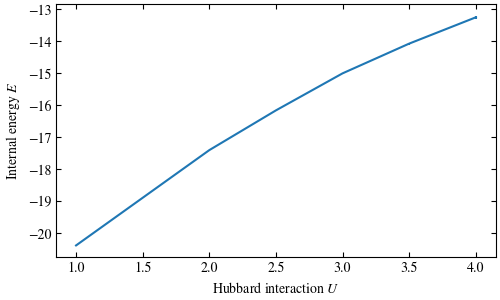

In [12]:
# Create figure with axis labels
fig, ax = plt.subplots()
ax.set_xlabel(r'Hubbard interaction $U$')
ax.set_ylabel(r'Internal energy $E$')

# Select only rows with l1==4 and sort by ham_u
df = res[res.l1 == 4].sort_values(by='ham_u')

# Plot data
ax.errorbar(df.ham_u, df.Ener_scal0, df.Ener_scal0_err);

### Equal-time correlation functions

ALF and pyALF offer support for correlation functions of the form

```{math}
:label: eq:correlation_eq
C(\boldsymbol{r}, n_1, n_2) &= \frac{1}{N_r} \sum_{\boldsymbol{r}_0}
\left\langle O(\boldsymbol{r}_0, n_1) O(\boldsymbol{r}_0 + \boldsymbol{r}, n_2)
\right\rangle
-
\left\langle O(n_1) \right\rangle
\left\langle O(n_2) \right\rangle
\\
C(\boldsymbol{k}, n_1, n_2) &= \frac{1}{N_r} \sum_{\boldsymbol{r}} e^{i \boldsymbol{k} \boldsymbol{r}} C(\boldsymbol{r}, n_1, n_2)
```

Where the sums go over the unit cells of the finite size Bravais lattice, $N_r$ is the number of unit cells and $n_1$, $n_2$ denominate the orbitals within a unit cell.

Each observable produces a set of members in the results, these are for example the ones for the equal-time Green's function:

In [13]:
for i in item.keys():
    if i.startswith('Green_eq'):
        print(i, np.shape(item[i]))

Green_eqK (1, 1, 36)
Green_eqK_err (1, 1, 36)
Green_eqK_sum (36,)
Green_eqK_sum_err (36,)
Green_eqR (1, 1, 36)
Green_eqR_err (1, 1, 36)
Green_eqR_sum (36,)
Green_eqR_sum_err (36,)
Green_eq_lattice ()


Members ending in `K`, `K_err`, `R` and `R_err` correspond to Eq. {eq}`eq:correlation_eq` and their errors. They have the shape $(N_\text{orb}, N_\text{orb}, N_r)$, where $N_\text{orb}$ is the number of orbitals per unit cell. The objects ending in `_sum` have been traced over the orbital degrees of freedom. To correctly interpret the index over the unit cells, the member ending in `_lattice` is a dictionary containing the parameters for creating a Bravais lattice object {class}`py_alf.Lattice`:

In [14]:
item['Green_eq_lattice']

{'L1': array([6., 0.]),
 'L2': array([0., 6.]),
 'a1': array([1., 0.]),
 'a2': array([0., 1.])}

In [15]:
from py_alf import Lattice
latt = Lattice(item['Green_eq_lattice'])

Here is, for example, the equal-time Greens function at $\boldsymbol{k}= (\pi,\pi)$ with its error:

In [16]:
n = latt.k_to_n([np.pi, np.pi])
print(item.Green_eqK_sum[n], item.Green_eqK_sum_err[n])

0.06526692607779117 0.0013046070203645834


The lattice object offers functions for conveniently plotting correlation functions in real and momentum space. Below, we plot the Spin-Spin correlations in real and momentum space, showing signs of antiferromagnetic order. 

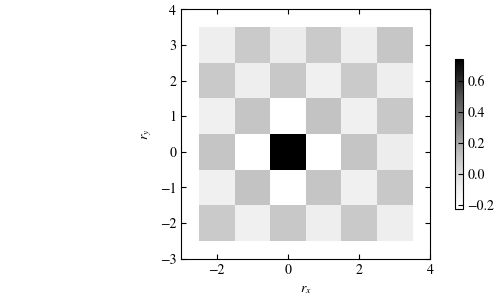

In [17]:
latt.plot_r(item.SpinZ_eqR_sum)

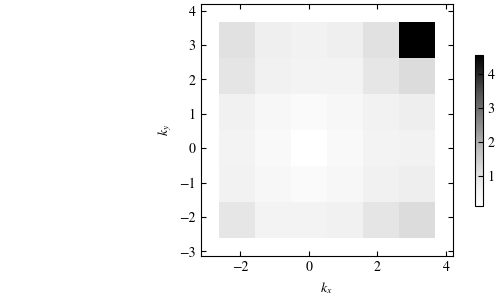

In [18]:
latt.plot_k(item.SpinZ_eqK_sum)

The plain text result files ending in `_K` and `_R` contain momentum and real-space resolved correlations, respectively. Here is an excerpt from the Greens function in momentum space:

In [19]:
!head -n 3 ALF_data/Hubbard/res/Green_eq_K

#    kx       ky   	              (0, 0)              	         trace over n_orb         
-2.09440 -2.09440	 1.4417820888e-01  6.0737564927e-03	 1.4417820888e-01  6.0737564927e-03
-2.09440 -1.04720	 1.0106239637e+00  1.1329334950e-02	 1.0106239637e+00  1.1329334950e-02


Where `(0, 0)` refers to the orbital indices. Since there is only one orbital per unit cell, this is the only combination and identical to the trace over all orbitals. The first two columns represent the coordinates, followed by alternating expectation values and standard errors.

### Time-displaced correlation functions

The structure for time-displaced correlation functions is very similar to equal-time correlations, but by default only the trace over the orbital degrees of freedom is stored. These are the results for the time-displaced Green function:

In [20]:
for i in item.keys():
    if i.startswith('Green_tau'):
        print(i, np.shape(item[i]))

Green_tauK (51, 36)
Green_tauK_err (51, 36)
Green_tauR (51, 36)
Green_tauR_err (51, 36)
Green_tau_lattice ()


Here we plot the time-displaced Greens function at $\boldsymbol{r}= 0$:

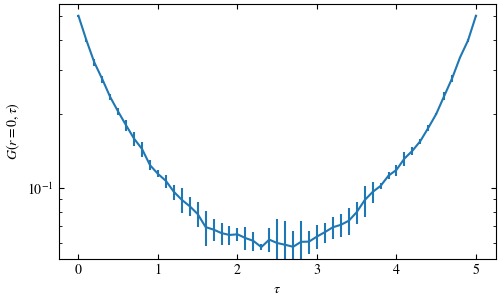

In [21]:
# Create figure with axis labels and logscale on y-axis
fig, ax = plt.subplots()
ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$G(r=0, \tau)$')
ax.set_yscale('log')

# Create lattice object
latt = Lattice(item['Green_tau_lattice'])

# Get index corresponding to r=0
n = latt.r_to_n([0, 0])

# Plot data
ax.errorbar(
    item.dtau*range(len(item.Green_tauR[:, n])),
    item.Green_tauR[:, n],
    item.Green_tauK_err[:, n]
);

Again, plain text results data are available in the folder `res`. There is a separate folder for each $\boldsymbol{k}$-point and the data for $\boldsymbol{r}=0$:

In [22]:
ls ALF_data/Hubbard/res/Green_tau

0.00_0.00/   1.05_0.00/    1.05_-2.09/   -2.09_1.05/   -2.09_3.14/  3.14_3.14/
0.00_-1.05/  -1.05_-1.05/  1.05_2.09/    2.09_-1.05/   2.09_3.14/   R0
0.00_1.05/   -1.05_1.05/   -1.05_3.14/   2.09_1.05/    3.14_0.00/
0.00_-2.09/  1.05_-1.05/   1.05_3.14/    -2.09_-2.09/  3.14_-1.05/
0.00_2.09/   1.05_1.05/    -2.09_0.00/   -2.09_2.09/   3.14_1.05/
0.00_3.14/   -1.05_-2.09/  2.09_0.00/    2.09_-2.09/   3.14_-2.09/
-1.05_0.00/  -1.05_2.09/   -2.09_-1.05/  2.09_2.09/    3.14_2.09/


The data is in the following format with tree columns: $\tau$, expectation value and error:

In [23]:
!head ALF_data/Hubbard/res/Green_tau/0.00_0.00/dat

     0.0000000       0.03348685       0.00547912
     0.1000000       0.01686925       0.00585814
     0.2000000       0.01793592       0.00935758
     0.3000000       0.01575110       0.00906065
     0.4000000       0.01096207       0.00657646
     0.5000000       0.00372588       0.00710389
     0.6000000       0.01155079       0.00842672
     0.7000000       0.00473281       0.01066049
     0.8000000       0.00177665       0.00989675
     0.9000000       0.00691428       0.00589819
